In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import torch, torchvision
from torchvision.transforms import transforms
import torch.optim as optim
import torch.nn as nn
import torch.nn.functional as F 
import cv2

%matplotlib inline

In [2]:
train_on_gpu = torch.cuda.is_available()

if not train_on_gpu:
  print('CUDA is not available: training on CPU...')
else:
  print('CUDA is available: training on GPU...')

CUDA is available: training on GPU...


In [3]:
# Transform the data into tensor and normalize
transform = transforms.Compose([transforms.ToTensor(),
                                 transforms.Normalize((0.5,0.5,0.5), (0.5,0.5,0.5))])

# prepare training and testing set
train_set = torchvision.datasets.CIFAR10(root = './data',
                                         train = True,
                                         download = True,
                                         transform = transform)

test_set = torchvision.datasets.CIFAR10(root = './data',
                                        train = False,
                                        transform = transform, 
                                        download = True)

# For training loader and testing loader
train_loader = torch.utils.data.DataLoader(train_set,
                                           batch_size = 64,
                                           shuffle=True)

test_loader = torch.utils.data.DataLoader(test_set,
                                          batch_size = 64,
                                          shuffle = True )

Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified


In [4]:
train_loader

In [5]:
print(train_set.data.shape)
print(test_set.data.shape)

(50000, 32, 32, 3)
(10000, 32, 32, 3)


In [6]:
for data in train_set:
  print(data)
  break

(tensor([[[-0.5373, -0.6627, -0.6078,  ...,  0.2392,  0.1922,  0.1608],
         [-0.8745, -1.0000, -0.8588,  ..., -0.0353, -0.0667, -0.0431],
         [-0.8039, -0.8745, -0.6157,  ..., -0.0745, -0.0588, -0.1451],
         ...,
         [ 0.6314,  0.5765,  0.5529,  ...,  0.2549, -0.5608, -0.5843],
         [ 0.4118,  0.3569,  0.4588,  ...,  0.4431, -0.2392, -0.3490],
         [ 0.3882,  0.3176,  0.4039,  ...,  0.6941,  0.1843, -0.0353]],

        [[-0.5137, -0.6392, -0.6235,  ...,  0.0353, -0.0196, -0.0275],
         [-0.8431, -1.0000, -0.9373,  ..., -0.3098, -0.3490, -0.3176],
         [-0.8118, -0.9451, -0.7882,  ..., -0.3412, -0.3412, -0.4275],
         ...,
         [ 0.3333,  0.2000,  0.2627,  ...,  0.0431, -0.7569, -0.7333],
         [ 0.0902, -0.0353,  0.1294,  ...,  0.1608, -0.5137, -0.5843],
         [ 0.1294,  0.0118,  0.1137,  ...,  0.4431, -0.0745, -0.2784]],

        [[-0.5059, -0.6471, -0.6627,  ..., -0.1529, -0.2000, -0.1922],
         [-0.8431, -1.0000, -1.0000,  ..., -

In [7]:
data_iter = iter(train_loader)
images, labels = data_iter.next()

print(images.shape)
print(labels.shape)

torch.Size([64, 3, 32, 32])
torch.Size([64])


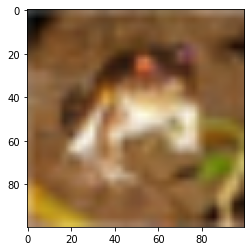

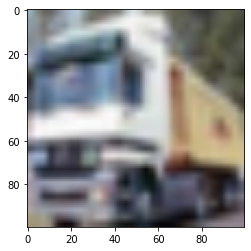

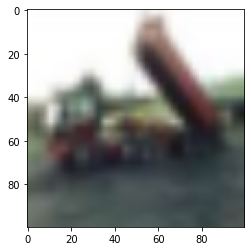

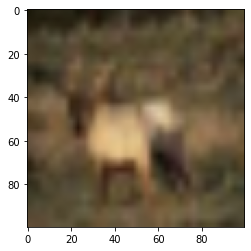

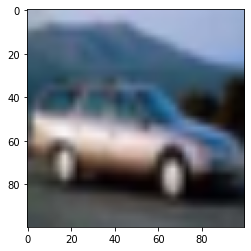

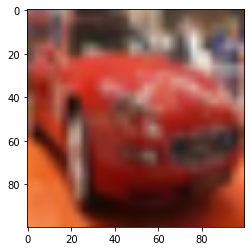

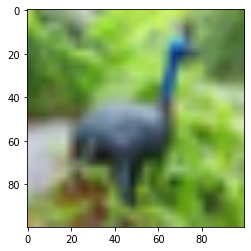

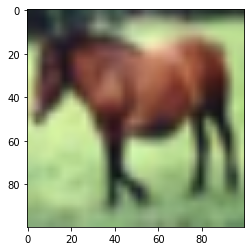

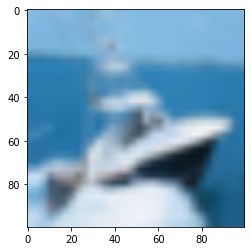

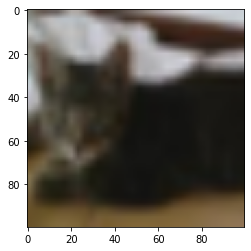

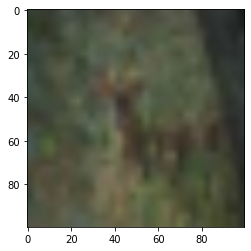

In [8]:
fig = plt.figure()
num_of_img = 10
for i in range(0, num_of_img + 1):
  IMG_SIZE = 100
  num_imgs = cv2.resize(train_set.data[i], (IMG_SIZE, IMG_SIZE))
  plt.imshow(num_imgs)
  plt.show()

In [11]:
def imshow(img):
    img = img/2 + 0.5   # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

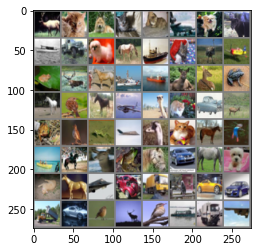

In [12]:
imshow(torchvision.utils.make_grid(images))

In [34]:
class Net(nn.Module):

  def __init__(self):
    super(Net, self).__init__()
    self.conv1 = nn.Conv2d(in_channels= 3, out_channels = 32, kernel_size = 5)
    self.pool = nn.MaxPool2d(2,2)
    self.conv2 = nn.Conv2d(in_channels = 32, out_channels = 64, kernel_size = 5)
    self.fc1 = nn.Linear(64*5*5, 2000)
    self.fc2 = nn.Linear(2000, 3000)
    self.fc3 = nn.Linear(3000,10)


  def forward(self, x):
    x = self.pool(F.relu(self.conv1(x)))
    x = self.pool(F.relu(self.conv2(x)))
    x = x.view(-1, 64*5*5)
    x = F.relu(self.fc1(x))
    x = F.relu(self.fc2(x))
    x = self.fc3(x)
    return x

net = Net()
print(net)

Net(
  (conv1): Conv2d(3, 32, kernel_size=(5, 5), stride=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(32, 64, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=1600, out_features=2000, bias=True)
  (fc2): Linear(in_features=2000, out_features=3000, bias=True)
  (fc3): Linear(in_features=3000, out_features=10, bias=True)
)


In [35]:
# Instantiate the cross-entropy loss
loss = nn.CrossEntropyLoss()

# Instantiate the RMSprop optimizer
optimizer = optim.Adam(net.parameters(),
                        lr = 0.001)

EPOCHS = 20

for epoch in range(EPOCHS):
  for data in train_loader:

    # getting inputs
    X, y = data

    # zero the parameter gradient
    net.zero_grad()

    # forward + backward + optimize
    output = net(X)
    loss = F.cross_entropy(output, y)
    loss.backward()
    optimizer.step()

  print(loss)

tensor(1.3450, grad_fn=<NllLossBackward>)
tensor(0.8440, grad_fn=<NllLossBackward>)
tensor(0.6202, grad_fn=<NllLossBackward>)
tensor(0.9054, grad_fn=<NllLossBackward>)
tensor(0.6194, grad_fn=<NllLossBackward>)
tensor(0.7229, grad_fn=<NllLossBackward>)
tensor(0.2712, grad_fn=<NllLossBackward>)
tensor(0.5467, grad_fn=<NllLossBackward>)
tensor(0.3304, grad_fn=<NllLossBackward>)
tensor(0.0538, grad_fn=<NllLossBackward>)
tensor(0.1875, grad_fn=<NllLossBackward>)
tensor(0.0271, grad_fn=<NllLossBackward>)
tensor(0.2401, grad_fn=<NllLossBackward>)
tensor(0.3921, grad_fn=<NllLossBackward>)
tensor(0.0047, grad_fn=<NllLossBackward>)
tensor(0.0267, grad_fn=<NllLossBackward>)
tensor(0.0028, grad_fn=<NllLossBackward>)
tensor(0.0042, grad_fn=<NllLossBackward>)
tensor(0.0003, grad_fn=<NllLossBackward>)
tensor(0.0309, grad_fn=<NllLossBackward>)


In [61]:
print('Loss = ', loss)

Loss =  tensor(0.0309, grad_fn=<NllLossBackward>)


In [63]:
def model_eval(dataloader):

  correct = 0
  total = 0

  with torch.no_grad():
    for data in train_loader:
      X, y = data
      output = net(X)
      max_val, preds = torch.max(output, dim = 1)

      for idx, i in enumerate(output):
        if torch.argmax(i) == y[idx]: 
          correct += 1                                          # If the predicted value is = to y than correct = correct + 1
        total += 1
        Accuracy = correct/total *100
  return Accuracy

print(correct, total)

48575 50000


In [53]:
print('Accuracy score = ', Accuracy)

Accuracy score =  97.15


In [55]:
train_acc = model_eval(train_loader) 
test_acc  = model_eval(test_loader)

In [57]:
print('Training score = {} and Testing score = {}'.format(train_acc, test_acc))

Training score = 97.15 and Testing score = 97.15
